# In this notebook we will start with the basic method of SENTIMENT ANALYSIS.


# Problem statement: Given a customer review can we predict the rating of the review (1-5). 1 being negative and 5 being positive.

# We will try using bag of words model for this experiment and traditional ML algorithms to predict the outcome.

In [1]:
import pandas as pd
import numpy as np
import nltk
import re # regex lib for cleaning
from nltk.corpus import stopwords # list of stopwords
from nltk.stem import WordNetLemmatizer # for lemmatizing (years to year)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler #undersampling
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.metrics import classification_report # precision, recall, f1

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['ggplot'])

In [2]:
df = pd.read_csv('cleaned_reviews.csv')
df.head()

,cleaned_reviews,rating
0,excellent,5
1,dog become healthy thank,5
2,quality service everyone happy,5
3,went top dog raw food morning first time amazi...,5
4,very stylish site enough information make choi...,5


## The length of each review is counted and stored in count. 
## empty countains the index of reviews having length=0 after cleaning the reviews.
## The empty reviews are dropped from the DataFrame.

In [3]:
count = []
for val in df['cleaned_reviews']:
    count.append(len(val.split()))

In [4]:
len(count)

1194697

# Histogram for the length of the reviews. Based on the max frequency of reviews the length of the reviews will be considered.

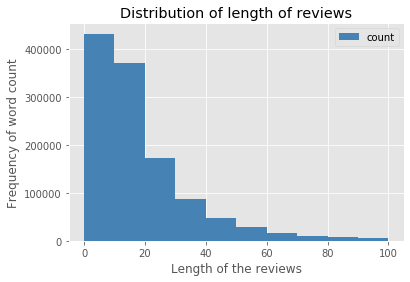

In [5]:
sent_len = pd.DataFrame({'count':count})
sent_len.plot(kind='hist', figsize=(6, 4), color='steelblue',bins = [0,10,20,30,40,50,60,70,80,90,100])
plt.title('Distribution of length of reviews')
plt.ylabel('Frequency of word count')
plt.xlabel('Length of the reviews')

plt.show()

### Distribution of the target variable containing 5 categories.

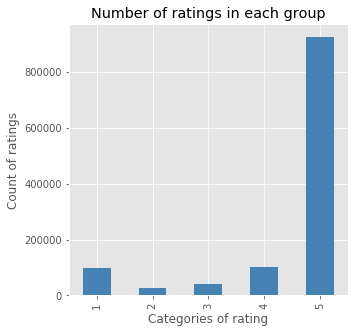

In [6]:
ratings = pd.value_counts(df['rating'], sort=False)
ratings.plot(kind='bar', figsize=(5, 5), color='steelblue')
plt.title('Number of ratings in each group')
plt.ylabel('Count of ratings')
plt.xlabel('Categories of rating')

plt.show()

# 82% of reviews have length upto 30 words.

In [7]:
cnt, edg = np.histogram(sent_len,bins = [0,10,20,30,40,50,60,70,80,90,100])
(cnt[0] + cnt[1] + cnt[2])/sum(cnt)

0.8275089153581621

### For the first model we will consider first 10 words of each reviews.

In [8]:
# max len of reviews to 10
review_len10 = []
for rev in df['cleaned_reviews']:
    rev = rev.split()
    review_len10.append(' '.join(rev[0:10]))
review_len10[4]

'very stylish site enough information make choice buy pet happy'

# Creating Bag of words model.

## Limiting the no. features to 500. It is expensive to create features using bag of words that treats each new word as a feature.

In [15]:
Cnt_vec = CountVectorizer(max_features=500)

## Creates an array using Bag of words.

In [16]:
bag_words = Cnt_vec.fit_transform(df['cleaned_reviews']).toarray()

In [3]:
# Target variable 
y_rating = df['rating'].to_numpy()

In [12]:
print('shape of feature matrix:',bag_words.shape,'shape of target variable', y_rating.shape)

shape of feature matrix: (1194697, 500) shape of target variable (1194697,)


In [17]:
# Undersampling object
rus = RandomUnderSampler(sampling_strategy={1:26000,2:26000,3:26000,4:26000,5:26000},random_state=0)
def under_sample(x,y):
    
    X_resampled, y_resampled = rus.fit_resample(x,y)
    return X_resampled, y_resampled

In [18]:
X_resampled, y_resampled = under_sample(bag_words[0:1189697,], y_rating[0:1189697])

In [15]:
# Test data 
X_test, y_test = bag_words[1189697:,] , y_rating[1189697:]

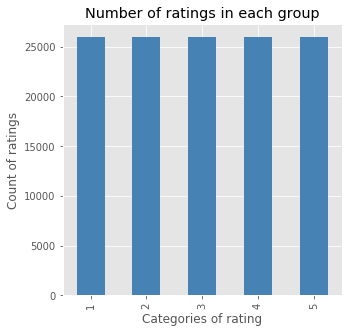

In [16]:
dis = pd.value_counts(y_resampled, sort=False)
dis.plot(kind='bar', figsize=(5, 5), color='steelblue')
plt.title('Number of ratings in each group')
plt.ylabel('Count of ratings')
plt.xlabel('Categories of rating')

plt.show()

# MODEL 1 : Naive Bayes model with multiple classes.

In [20]:
# Naive Bayes 
clf = MultinomialNB()

In [18]:
# Training the model on the udersampled data.
X_resampled,y_resampled= under_sample(bag_words[0:1189697,], y_rating[0:1189697])
clf.fit(X_resampled, y_resampled)

MultinomialNB()

In [19]:
# Prediction on the 
pred = clf.predict(X_test)

In [20]:
#from sklearn.metrics import multilabel_confusion_matrix
#cm = multilabel_confusion_matrix(y_test, pred)
#cm


In [21]:
# Confusion Matrix
print(confusion_matrix(y_test, pred))

[[ 289   70   31   26   61]
 [  48   35   29   10   27]
 [  29   41   45   41   63]
 [  43   38   65  146  214]
 [ 191  196  184  579 2499]]


In [22]:
# Precision, Recall, F1-score 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.48      0.61      0.54       477
           2       0.09      0.23      0.13       149
           3       0.13      0.21      0.16       219
           4       0.18      0.29      0.22       506
           5       0.87      0.68      0.77      3649

    accuracy                           0.60      5000
   macro avg       0.35      0.40      0.36      5000
weighted avg       0.71      0.60      0.64      5000



## In the above model we created features using bag of words. Using CountVectorization that takes words as feature based on the frequencies.

## Next model we will consider TF-IDF method to create the word vectors. Based on TF-IDF we will built Naive Bayes model to test the model's performance.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
#limiting features to 500
tf_idf = TfidfVectorizer(max_features=500)

In [7]:
bow_tf_idf = tf_idf.fit_transform(df['cleaned_reviews']).toarray()

In [7]:
#resample the training set
X_resampled_tf, y_resampled_tf = rus.fit_resample(bow_tf_idf[0:1189697,], y_rating[0:1189697])

X_test_tf, y_test_tf = bow_tf_idf[1189697:,] , y_rating[1189697:]

NameError: name 'y_rating' is not defined

In [17]:
Tf_clf = MultinomialNB()

In [18]:
Tf_clf.fit(X_resampled_tf, y_resampled_tf)

MultinomialNB()

In [21]:
pred_tf = Tf_clf.predict(X_test_tf)

In [22]:
print(confusion_matrix(y_test_tf, pred_tf))

[[ 314   55   35   21   52]
 [  55   35   27   11   21]
 [  36   48   49   34   52]
 [  54   41   88  133  190]
 [ 251  226  251  629 2292]]


In [23]:
print(classification_report(y_test_tf, pred_tf))

              precision    recall  f1-score   support

           1       0.44      0.66      0.53       477
           2       0.09      0.23      0.13       149
           3       0.11      0.22      0.15       219
           4       0.16      0.26      0.20       506
           5       0.88      0.63      0.73      3649

    accuracy                           0.56      5000
   macro avg       0.34      0.40      0.35      5000
weighted avg       0.71      0.56      0.62      5000



### There is not a significant change in the performance of the model. 

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

In [9]:
X_resampled,y_resampled= under_sample(bow_tf_idf[0:1189697,], y_rating[0:1189697])

In [13]:
clf_dt = DecisionTreeClassifier(random_state=0)

In [14]:
clf_dt = clf_dt.fit(X_resampled,y_resampled)

In [15]:
plt.figure(figsize=(16,8))

plot_tree(clf_dt, filled = True, rounded = True, class_names = ['1','2','3','4','5'])
    

[Text(700.7368496892373, 434.52059504132234, 'X[263] <= 0.021\ngini = 0.8\nsamples = 130000\nvalue = [26000, 26000, 26000, 26000, 26000]\nclass = 1'),
 Text(544.6512232403228, 433.80178512396697, 'X[257] <= 0.018\ngini = 0.787\nsamples = 80066\nvalue = [11320, 12538, 14799, 19226, 22183]\nclass = 5'),
 Text(517.046828218246, 433.0829752066116, 'X[494] <= 0.043\ngini = 0.783\nsamples = 75410\nvalue = [9423, 11648, 14138, 18650, 21551]\nclass = 5'),
 Text(492.4682978895748, 432.3641652892562, 'X[262] <= 0.007\ngini = 0.781\nsamples = 74868\nvalue = [8976, 11602, 14109, 18639, 21542]\nclass = 5'),
 Text(447.4984068614573, 431.64535537190085, 'X[174] <= 0.096\ngini = 0.776\nsamples = 68538\nvalue = [7366, 10192, 12945, 17560, 20475]\nclass = 5'),
 Text(398.9398914028609, 430.9265454545455, 'X[133] <= 0.131\ngini = 0.783\nsamples = 53800\nvalue = [6389, 8487, 10632, 13416, 14876]\nclass = 5'),
 Text(379.93615522559605, 430.2077355371901, 'X[114] <= 0.082\ngini = 0.786\nsamples = 50378\nvalu

Error in callback <function flush_figures at 0x00000202E000F5E8> (for post_execute):


KeyboardInterrupt: 

In [18]:
X_test_dt, y_test_dt = bow_tf_idf[1189697:,] , y_rating[1189697:]

In [20]:
pred_dt = clf_dt.predict(X_test_dt)

In [22]:
print(confusion_matrix(y_test_df, pred_dt))

[[ 188  100   88   60   41]
 [  38   39   26   28   18]
 [  36   48   48   53   34]
 [  62   73  111  132  128]
 [ 318  494  621  934 1282]]


In [23]:
print(classification_report(y_test_dt, pred_dt))

              precision    recall  f1-score   support

           1       0.29      0.39      0.34       477
           2       0.05      0.26      0.09       149
           3       0.05      0.22      0.09       219
           4       0.11      0.26      0.15       506
           5       0.85      0.35      0.50      3649

    accuracy                           0.34      5000
   macro avg       0.27      0.30      0.23      5000
weighted avg       0.67      0.34      0.42      5000



In [10]:
from sklearn.model_selection import RandomizedSearchCV 

In [67]:
# Creating the hyperparameter grid  
param_dist = {"max_depth":[i for i in range(500,1000,5) ]} 

In [68]:
tree = DecisionTreeClassifier() 

In [ ]:
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_resampled,y_resampled) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

In [19]:
# Creating the hyperparameter grid  
param_dist = {"max_depth":[80, 90, 110, 150],"min_samples_split":[100, 1000,1500]} 

In [20]:
tree = DecisionTreeClassifier() 

In [21]:
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 3, n_iter=50) 
  
tree_cv.fit(X_resampled,y_resampled) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

C:\Users\12014\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Tuned Decision Tree Parameters: {'min_samples_split': 1000, 'max_depth': 150}
Best score is 0.3743153731804803
